In [1]:
import os
import pickle
import json
import string
from collections import Counter
from markov_processor import MarkovProcessor

def main_processing():
    """Main processing function - creates and uses MarkovProcessor."""
    
    # Configuration
    root_dir = './data'
    output_dir = './processed'
    os.makedirs(output_dir, exist_ok=True)
    
    # Define additional characters for specific datasets
    # Format: {dataset_name: {'letters': 'chars', 'digits': 'chars', 'symbols': 'chars'}}
    dataset_specific_chars = {
        'cartigratis': {
            'letters': "ăâîșțĂÂÎȘȚ",     # Add to letters category
            'digits': "",               # No additional digits
            'symbols': ""               # No additional symbols
        }
    }
    
    print("Starting dataset processing...")
    
    # Discover datasets
    if not os.path.exists(root_dir):
        print(f"ERROR: Root directory does not exist: {root_dir}")
        return
    
    datasets = [item for item in os.listdir(root_dir) if os.path.isdir(os.path.join(root_dir, item))]
    print(f"Found {len(datasets)} datasets: {datasets}")
    
    # Process each dataset
    results = {}
    for dataset_name in datasets:
        # Start with base configuration
        base_letters = string.ascii_letters
        base_digits = string.digits
        base_symbols = string.punctuation + " \t\n"
        
        # Get dataset-specific characters
        dataset_config = dataset_specific_chars.get(dataset_name, {
            'letters': "", 'digits': "", 'symbols': ""
        })
        
        # Combine character sets
        final_letters = base_letters + dataset_config['letters']
        final_digits = base_digits + dataset_config['digits']
        final_symbols = base_symbols + dataset_config['symbols']
        
        # Create processor with combined character set
        processor = MarkovProcessor(
            allowed_letters=final_letters,
            allowed_digits=final_digits,
            allowed_symbols=final_symbols
        )
        
        dataset_path = os.path.join(root_dir, dataset_name)
        result = processor.process_dataset(dataset_path, dataset_name)
        results[dataset_name] = result
    
    # Save results as pickle
    pickle_file = os.path.join(output_dir, 'markov_chains.pkl')
    with open(pickle_file, 'wb') as f:
        pickle.dump(results, f)
    
    # Save results as JSON (convert problematic types like Counter)
    def convert_for_json(obj):
        """Convert Counter objects and other non-serializable types to JSON-compatible format."""
        if isinstance(obj, Counter):
            return dict(obj)
        elif isinstance(obj, dict):
            return {key: convert_for_json(value) for key, value in obj.items()}
        elif isinstance(obj, list):
            return [convert_for_json(item) for item in obj]
        else:
            return obj
    
    # Convert results for JSON serialization
    json_results = convert_for_json(results)
    
    json_file = os.path.join(output_dir, 'markov_chains.json')
    with open(json_file, 'w', encoding='utf-8') as f:
        json.dump(json_results, f, ensure_ascii=False, indent=2)
    
    print(f"\n{'='*50}")
    print(f"Processing complete. Results saved to:")
    print(f"  Pickle: {pickle_file}")
    print(f"  JSON: {json_file}")
    print(f"{'='*50}")
    
    # Print summary
    print("\n=== FINAL SUMMARY ===")
    for dataset_name, data in results.items():
        stats = data['stats']
        config = data['config']
        print(f"\n{dataset_name}:")
        print(f"  Files: {stats['file_count']:,}")
        print(f"  Total Characters: {stats['total_characters']:,}")
        print(f"  Unique Characters: {stats['unique_characters']:,}")
        print(f"  Allowed Letters: {len(config['allowed_letters'])} chars")
        print(f"  Allowed Digits: {len(config['allowed_digits'])} chars")
        print(f"  Allowed Symbols: {len(config['allowed_symbols'])} chars")
    
    print(f"\nTotal datasets processed: {len(results)}")
    
    return results

# Execute processing
results = main_processing()

Starting dataset processing...
Found 5 datasets: ['simple_wikipedia', 'the_algorithms_code', 'gutenberg', 'cartigratis', 'newsgroup']

Processing dataset: simple_wikipedia

Processing dataset: the_algorithms_code
    Progress: 100 files processed
    Progress: 200 files processed
    Progress: 300 files processed
    Progress: 400 files processed
    Progress: 500 files processed
    Progress: 600 files processed
    Progress: 700 files processed
    Progress: 800 files processed
    Progress: 900 files processed
    Progress: 1000 files processed
    Progress: 1100 files processed
    Progress: 1200 files processed
    Progress: 1300 files processed
    Progress: 1400 files processed
    Progress: 1500 files processed
    Progress: 1600 files processed
    Progress: 1700 files processed
    Progress: 1800 files processed
    Progress: 1900 files processed
    Progress: 2000 files processed
    Progress: 2100 files processed
    Progress: 2200 files processed
    Progress: 2300 files p

In [2]:
def print_allowed_characters(results):
    """Print allowed characters for all datasets in a clear format."""
    print("\n=== ALLOWED CHARACTERS SUMMARY ===")
    for dataset_name, data in results.items():
        config = data['config']
        
        print(f"\n{dataset_name.upper()}:")
        print(f"  Letters ({len(config['allowed_letters'])}): {config['allowed_letters']}")
        print(f"  Digits ({len(config['allowed_digits'])}): {config['allowed_digits']}")
        print(f"  Symbols ({len(config['allowed_symbols'])}): {config['allowed_symbols']}")
        print(f"  Total allowed: {config['total_whitelist_chars']} characters")

print_allowed_characters(results)


=== ALLOWED CHARACTERS SUMMARY ===

SIMPLE_WIKIPEDIA:
  Letters (52): abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ
  Digits (10): 0123456789
  Symbols (35): !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~ 	

  Total allowed: 97 characters

THE_ALGORITHMS_CODE:
  Letters (52): abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ
  Digits (10): 0123456789
  Symbols (35): !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~ 	

  Total allowed: 97 characters

GUTENBERG:
  Letters (52): abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ
  Digits (10): 0123456789
  Symbols (35): !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~ 	

  Total allowed: 97 characters

CARTIGRATIS:
  Letters (62): abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZăâîșțĂÂÎȘȚ
  Digits (10): 0123456789
  Symbols (35): !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~ 	

  Total allowed: 107 characters

NEWSGROUP:
  Letters (52): abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ
  Digits (10): 0123456789
  Symbols (35): !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~ 	

  Total allowed


SEPARATE CHARACTER CATEGORY VISUALIZATIONS
✅ Successfully loaded data from ./processed/markov_chains.pkl
Found datasets: ['simple_wikipedia', 'the_algorithms_code', 'gutenberg', 'cartigratis', 'newsgroup']

📊 Plotting Alphabetic Characters (Letters)


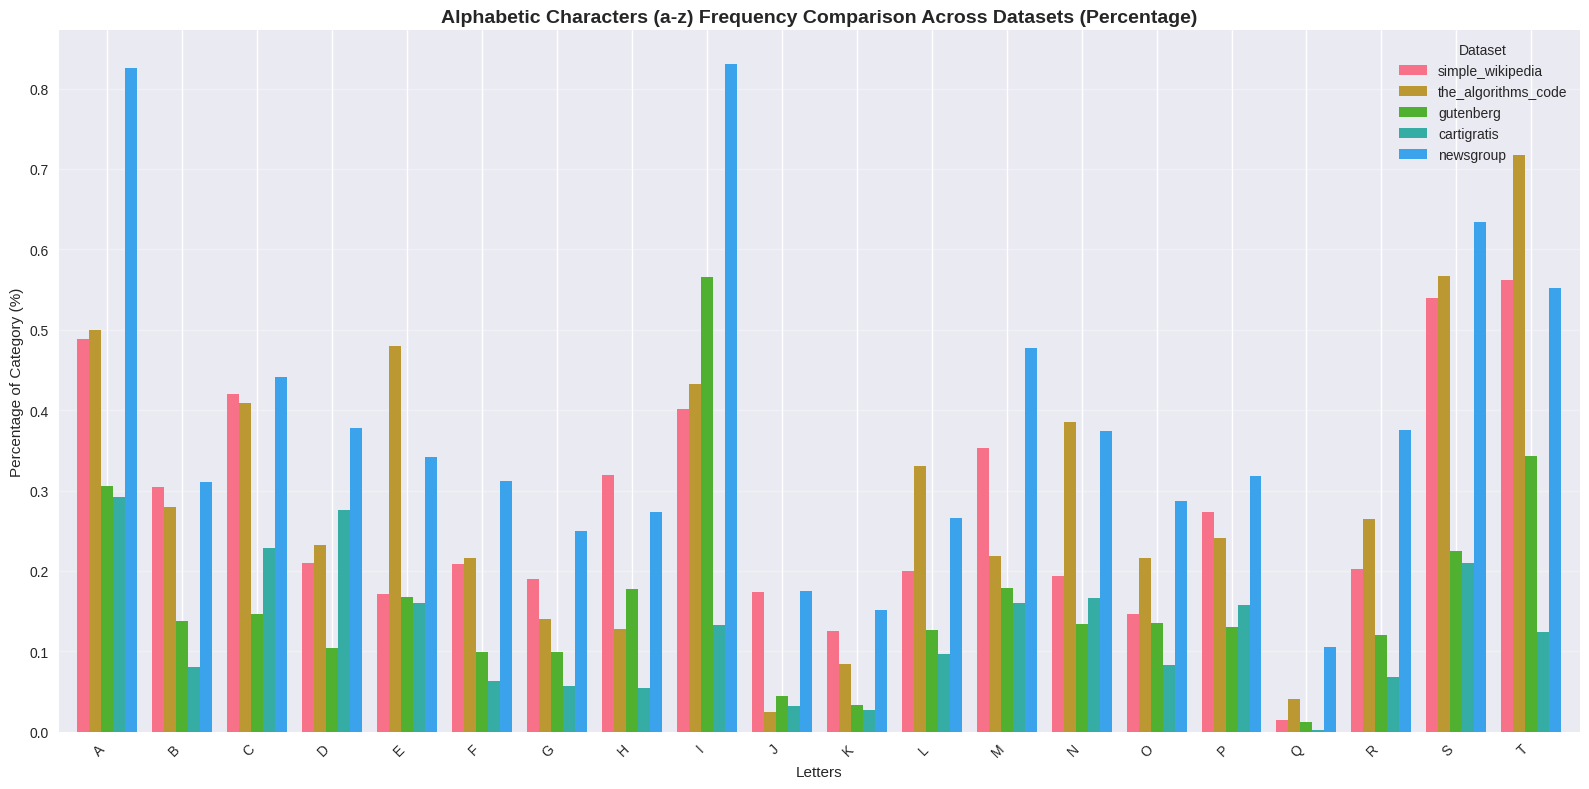


📊 Plotting Numeric Characters (Digits)


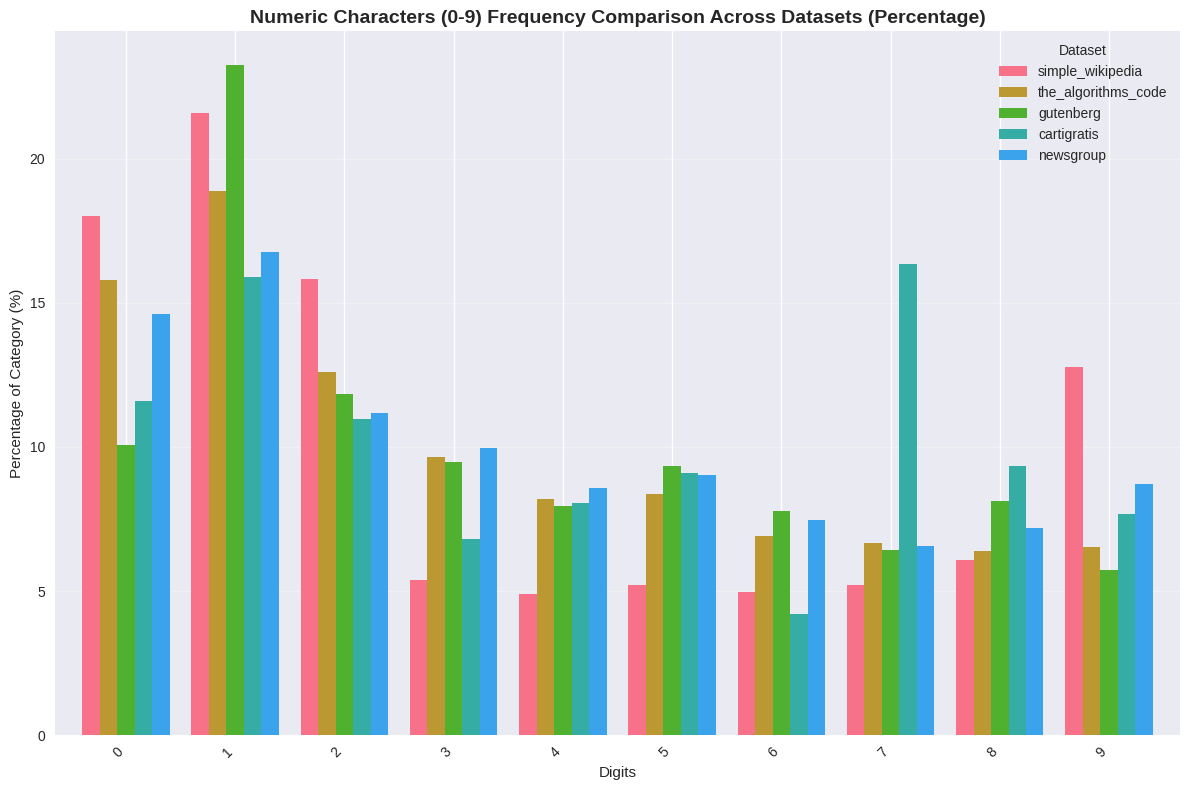


📊 Plotting Symbol Characters


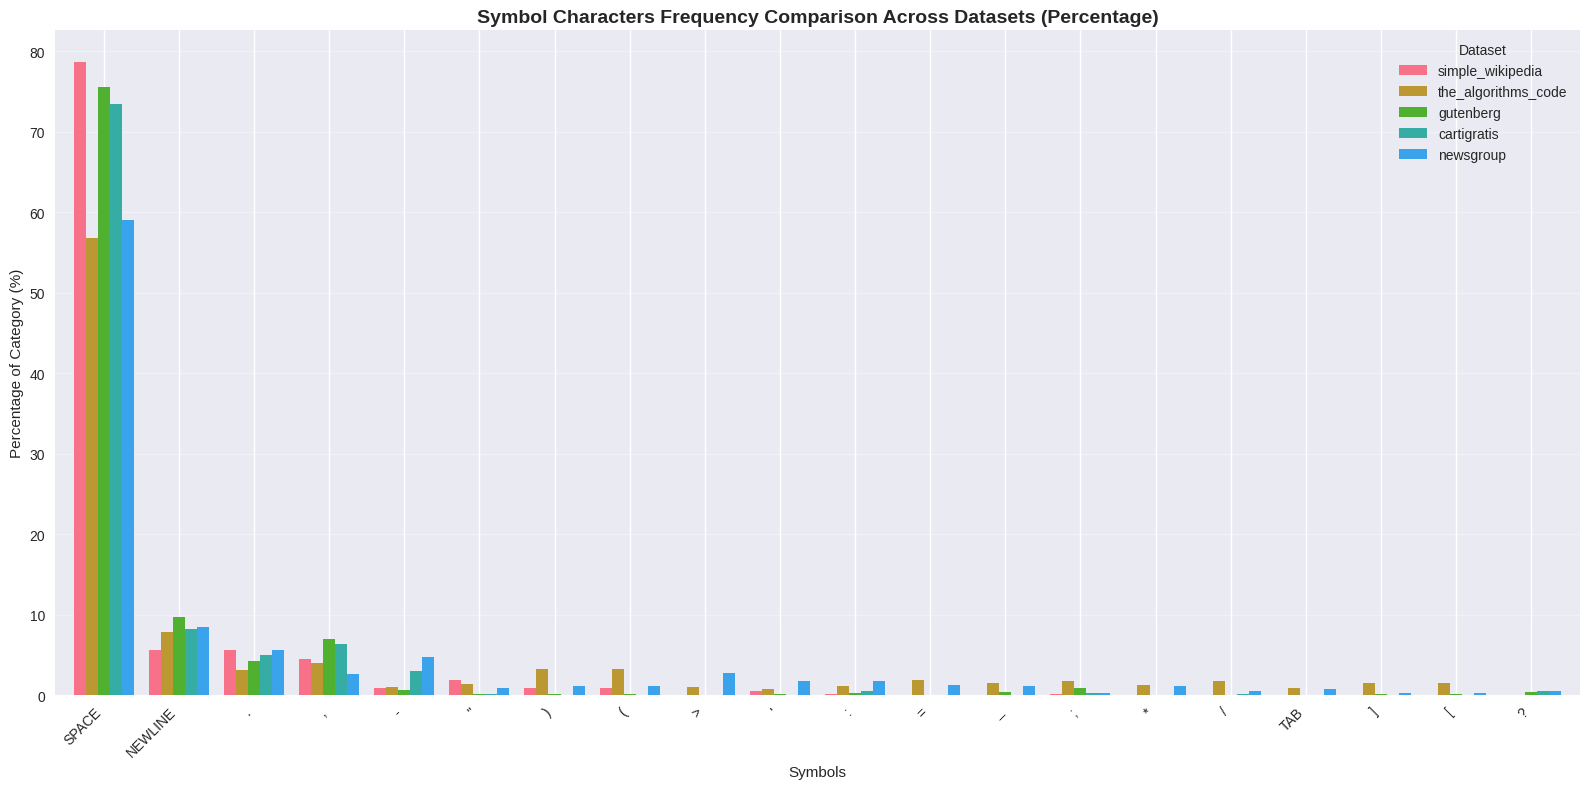


✅ Separate visualizations complete!


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from collections import Counter
import pickle
import os

# Set up the plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 10

print("\n" + "="*80)
print("SEPARATE CHARACTER CATEGORY VISUALIZATIONS")
print("="*80)

# Load the data
try:
    data_file = './processed/markov_chains.pkl'
    if not os.path.exists(data_file):
        print(f"ERROR: Data file not found: {data_file}")
        data = {}
    else:
        with open(data_file, 'rb') as f:
            data = pickle.load(f)
        print(f"✅ Successfully loaded data from {data_file}")
except Exception as e:
    print(f"ERROR loading data: {e}")
    data = {}

if not data:
    print("No data to visualize!")
    exit()

dataset_names = list(data.keys())
print(f"Found datasets: {dataset_names}")

# Function to format special characters for display
def format_char(char):
    # Handle cases where char might not be a single character
    if not isinstance(char, str) or len(str(char)) != 1:
        return str(char)
    
    char_str = str(char)
    if char_str == ' ':
        return 'SPACE'
    elif char_str == '\n':
        return 'NEWLINE'
    elif char_str == '\t':
        return 'TAB'
    elif char_str == '\r':
        return 'RETURN'
    elif ord(char_str) < 32:
        return f'U+{ord(char_str):04X}'
    else:
        return char_str

# --- Prepare data for visualization ---

# 1. Letters (Alphabetic - from markov chain)
letter_data = {}
for name in dataset_names:
    markov_chain = data[name]['markov_chain']
    letter_counts = {}
    total_letters = 0
    for char, info in markov_chain.items():
        if info['category'] == 'letter':
            letter_counts[char] = info['count']
            total_letters += info['count']
    letter_data[name] = {
        'counts': letter_counts,
        'total': total_letters
    }

# 2. Numbers (Numeric - from markov chain)
digit_data = {}
for name in dataset_names:
    markov_chain = data[name]['markov_chain']
    digit_counts = {}
    total_digits = 0
    for char, info in markov_chain.items():
        if info['category'] == 'digit':
            digit_counts[char] = info['count']
            total_digits += info['count']
    digit_data[name] = {
        'counts': digit_counts,
        'total': total_digits
    }

# 3. Symbols
symbol_data = {}
for name in dataset_names:
    markov_chain = data[name]['markov_chain']
    symbol_counts = {}
    total_symbols = 0
    for char, info in markov_chain.items():
        if info['category'] == 'symbol':
            symbol_counts[char] = info['count']
            total_symbols += info['count']
    symbol_data[name] = {
        'counts': symbol_counts,
        'total': total_symbols
    }

# --- Visualization Functions ---

def plot_character_category(title, char_data_dict, category_label):
    """Plot a grouped bar chart for a character category across datasets."""
    # Collect all unique characters
    all_chars = set()
    for d in char_data_dict.values():
        all_chars.update(d['counts'].keys())
    
    # Sort characters - letters alphabetically, numbers numerically, others by frequency
    try:
        if category_label == "Letters":
            all_chars = sorted(all_chars)
        elif category_label == "Digits":
            all_chars = sorted([c for c in all_chars if str(c).isdigit()], key=lambda x: int(str(x)))
            all_chars.extend([c for c in all_chars if not str(c).isdigit()])  # Add non-digits if any
        else:
            # For symbols, sort by total frequency across all datasets
            char_totals = Counter()
            for d in char_data_dict.values():
                for char, count in d['counts'].items():
                    char_totals[char] += count
            all_chars = [char for char, _ in char_totals.most_common()]
    except:
        all_chars = sorted(all_chars)
    
    # Limit to top 20 characters for readability
    all_chars = all_chars[:20]
    
    # Prepare data for DataFrame
    df_data = []
    for name, info in char_data_dict.items():
        counts = info['counts']
        total = info['total']
        row = {'Dataset': name}
        for char in all_chars:
            count = counts.get(char, 0)
            pct = (count / total * 100) if total > 0 else 0
            row[format_char(char)] = pct
        df_data.append(row)

    if not df_data:
        print(f"No data to plot for {title}")
        return

    df = pd.DataFrame(df_data).set_index('Dataset').T
    
    # Create the plot
    fig, ax = plt.subplots(figsize=(max(12, len(all_chars) * 0.8), 8))
    df.plot(kind='bar', ax=ax, width=0.8)
    ax.set_title(f'{title} Frequency Comparison Across Datasets (Percentage)', fontsize=14, fontweight='bold')
    ax.set_ylabel('Percentage of Category (%)')
    ax.set_xlabel(f'{category_label}')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Dataset')
    plt.grid(True, axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

# --- Plot each category ---

print("\n📊 Plotting Alphabetic Characters (Letters)")
plot_character_category(
    title="Alphabetic Characters (a-z)",
    char_data_dict=letter_data,
    category_label="Letters"
)

print("\n📊 Plotting Numeric Characters (Digits)")
plot_character_category(
    title="Numeric Characters (0-9)",
    char_data_dict=digit_data,
    category_label="Digits"
)

print("\n📊 Plotting Symbol Characters")
plot_character_category(
    title="Symbol Characters",
    char_data_dict=symbol_data,
    category_label="Symbols"
)

print("\n✅ Separate visualizations complete!")

In [4]:
import os
import pickle
import json
import string
import re
from collections import Counter, defaultdict

def is_valid_word(word, allowed_letters, min_length=2):
    """Check if a word is valid (contains only letters and meets minimum length)"""
    if len(word) < min_length:
        return False
    
    # Word should contain only allowed letters
    return all(char in allowed_letters for char in word)

def extract_words_from_text(text, allowed_letters):
    """Extract valid words from text using regex and validation"""
    # Create character class for regex from allowed letters
    # Escape special regex characters
    escaped_letters = re.escape(''.join(sorted(set(allowed_letters))))
    
    # Find sequences of allowed letters
    word_pattern = f'[{escaped_letters}]+'
    
    # Extract all letter sequences
    potential_words = re.findall(word_pattern, text, re.IGNORECASE)
    
    # Filter for valid words
    valid_words = []
    for word in potential_words:
        if is_valid_word(word, allowed_letters):
            valid_words.append(word.lower())  # Normalize to lowercase
    
    return valid_words

def main_processing():
    """Main processing function - analyzes character and word frequencies in datasets."""
    
    # Configuration
    root_dir = './data'
    output_dir = './processed'
    os.makedirs(output_dir, exist_ok=True)
    
    print("Starting dataset processing...")
    
    # Discover datasets
    if not os.path.exists(root_dir):
        print(f"ERROR: Root directory does not exist: {root_dir}")
        return
    
    datasets = [item for item in os.listdir(root_dir) if os.path.isdir(os.path.join(root_dir, item))]
    print(f"Found {len(datasets)} datasets: {datasets}")
    
    # Process each dataset
    results = {}
    for dataset_name in datasets:
        # Define character sets based on dataset
        if dataset_name.lower() == 'cartigratis':
            allowed_letters = string.ascii_letters + "ăâîșțĂÂÎȘȚ"
        else:
            allowed_letters = string.ascii_letters
        
        allowed_digits = string.digits
        allowed_symbols = string.punctuation + " \t\n"
        
        # Initialize counters
        char_counter = Counter()
        category_counters = {
            'letters': Counter(),
            'digits': Counter(),
            'symbols': Counter()
        }
        word_counter = Counter()
        
        total_chars = 0
        total_words = 0
        
        # Process all files in the dataset
        dataset_path = os.path.join(root_dir, dataset_name)
        
        # Walk through all files in the dataset directory
        for root, dirs, files in os.walk(dataset_path):
            for file in files:
                file_path = os.path.join(root, file)
                try:
                    with open(file_path, 'r', encoding='utf-8', errors='ignore') as f:
                        content = f.read()
                        
                        # Process characters (unchanged)
                        for char in content:
                            total_chars += 1
                            
                            if char in allowed_letters:
                                char_counter[char] += 1
                                category_counters['letters'][char] += 1
                            elif char in allowed_digits:
                                char_counter[char] += 1
                                category_counters['digits'][char] += 1
                            elif char in allowed_symbols:
                                char_counter[char] += 1
                                category_counters['symbols'][char] += 1
                        
                        # Extract valid words using improved method
                        valid_words = extract_words_from_text(content, allowed_letters)
                        
                        # Count words
                        for word in valid_words:
                            word_counter[word] += 1
                            total_words += 1
                
                except Exception as e:
                    print(f"Error processing file {file_path}: {e}")
        
        # Calculate character frequencies (unchanged)
        char_frequencies = {}
        for char, count in char_counter.items():
            relative_freq = count / total_chars if total_chars > 0 else 0
            char_frequencies[char] = {
                'absolute': count,
                'relative': relative_freq
            }
        
        # Calculate category-specific frequencies (unchanged)
        category_frequencies = {}
        for category, counter in category_counters.items():
            category_frequencies[category] = {}
            category_total = sum(counter.values())
            for char, count in counter.items():
                relative_freq = count / category_total if category_total > 0 else 0
                category_frequencies[category][char] = {
                    'absolute': count,
                    'relative': relative_freq,
                    'category_relative': relative_freq
                }
        
        # Convert word counter to sorted list by frequency
        sorted_words = []
        for word, count in word_counter.most_common():
            relative_freq = count / total_words if total_words > 0 else 0
            sorted_words.append({
                'word': word,
                'absolute': count,
                'relative': relative_freq,
                'percentage': relative_freq * 100
            })
        
        # Prepare result for this dataset
        result = {
            'config': {
                'allowed_letters': allowed_letters,
                'allowed_digits': allowed_digits,
                'allowed_symbols': allowed_symbols,
                'min_word_length': 2
            },
            'stats': {
                'total_characters': total_chars,
                'unique_characters': len(char_counter),
                'total_words': total_words,
                'unique_words': len(word_counter)
            },
            'character_frequencies': char_frequencies,
            'category_frequencies': category_frequencies,
            'word_frequencies': sorted_words
        }
        
        results[dataset_name] = result
        print(f"Processed {dataset_name}: {total_chars} chars, {len(word_counter)} unique words")
        
        # Show sample of top words for debugging
        print(f"  Top 10 words: {[w['word'] for w in sorted_words[:10]]}")
    
    # Save results
    pickle_file = os.path.join(output_dir, 'frequency_analysis.pkl')
    with open(pickle_file, 'wb') as f:
        pickle.dump(results, f)
    
    json_file = os.path.join(output_dir, 'frequency_analysis.json')
    with open(json_file, 'w', encoding='utf-8') as f:
        json.dump(results, f, ensure_ascii=False, indent=2)
    
    print(f"\nProcessing complete. Results saved to:")
    print(f"  Pickle: {pickle_file}")
    print(f"  JSON: {json_file}")
    
    return results

# Additional utility function for analysis
def analyze_word_patterns(results, dataset_name):
    """Analyze patterns in the word data for debugging"""
    if dataset_name not in results:
        print(f"Dataset {dataset_name} not found")
        return
    
    words = results[dataset_name]['word_frequencies']
    
    print(f"\nAnalysis for {dataset_name}:")
    print(f"Total unique words: {len(words)}")
    
    # Length distribution
    length_dist = Counter()
    for word_data in words:
        length_dist[len(word_data['word'])] += 1
    
    print("Word length distribution:")
    for length in sorted(length_dist.keys()):
        print(f"  Length {length}: {length_dist[length]} words")
    
    # Show words with unusual patterns
    suspicious_words = []
    for word_data in words[:50]:  # Check top 50
        word = word_data['word']
        if any(char.isdigit() for char in word) or len(word) == 1:
            suspicious_words.append(word)
    
    if suspicious_words:
        print(f"Suspicious words found: {suspicious_words}")
    else:
        print("No suspicious words in top 50")

# Execute processing
if __name__ == "__main__":
    results = main_processing()
    
    # Analyze Romanian data specifically
    if 'cartigratis' in results:
        analyze_word_patterns(results, 'cartigratis')

Starting dataset processing...
Found 5 datasets: ['simple_wikipedia', 'the_algorithms_code', 'gutenberg', 'cartigratis', 'newsgroup']
Processed simple_wikipedia: 178255102 chars, 376587 unique words
  Top 10 words: ['the', 'of', 'in', 'and', 'is', 'to', 'was', 'it', 'he', 'on']
Processed the_algorithms_code: 29678679 chars, 47659 unique words
  Top 10 words: ['the', 'if', 'int', 'return', 'of', 'node', 'for', 'to', 'is', 'in']
Processed gutenberg: 74900254 chars, 136663 unique words
  Top 10 words: ['the', 'and', 'of', 'to', 'in', 'that', 'he', 'it', 'was', 'his']
Processed cartigratis: 43233853 chars, 181250 unique words
  Top 10 words: ['de', 'în', 'să', 'nu', 'pe', 'se', 'cu', 'la', 'un', 'că']
Processed newsgroup: 72077419 chars, 113729 unique words
  Top 10 words: ['the', 'to', 'of', 'and', 'in', 'is', 'that', 'ax', 'it', 'for']

Processing complete. Results saved to:
  Pickle: ./processed/frequency_analysis.pkl
  JSON: ./processed/frequency_analysis.json

Analysis for cartigratis

In [6]:
import pickle
import pandas as pd

# Load the pickle file
with open('./processed/frequency_analysis.pkl', 'rb') as f:
    results = pickle.load(f)

# Get the maximum number of words across all datasets
max_words = max(len(data['word_frequencies']) for data in results.values()) if results else 0

# Create a combined table with top 1000 words
all_datasets = list(results.keys())
top_n = min(1000, max_words)  # Use minimum of 1000 or max words available

# Create DataFrame with rank and words from each dataset
table_data = {'Rank': range(1, top_n + 1)}

for dataset_name in all_datasets:
    words = results[dataset_name]['word_frequencies']
    dataset_words = []
    for i in range(top_n):
        if i < len(words):
            dataset_words.append(words[i]['word'])
        else:
            dataset_words.append('')  # Empty if no word at this rank
    table_data[dataset_name] = dataset_words

# Create the DataFrame
df = pd.DataFrame(table_data)

# Display the table
print(f"Top {top_n} words comparison across datasets")
print(f"Datasets: {', '.join(all_datasets)}")
print("="*80)

# Print the table
print(df.to_string(index=False, max_rows=1000, max_colwidth=30))

Top 1000 words comparison across datasets
Datasets: simple_wikipedia, the_algorithms_code, gutenberg, cartigratis, newsgroup
 Rank simple_wikipedia      the_algorithms_code     gutenberg   cartigratis     newsgroup
    1              the                      the           the            de           the
    2               of                       if           and            în            to
    3               in                      int            of            să            of
    4              and                   return            to            nu           and
    5               is                       of            in            pe            in
    6               to                     node          that            se            is
    7              was                      for            he            cu          that
    8               it                       to            it            la            ax
    9               he                       is           was    